In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization,LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_path = Path("C:\Chestxrayvision\ADANIPORTS.csv")
if not data_path.exists():
    print(f"File not found: {data_path}")
    print("Please update the path to your data file")
    
df = pd.read_csv(data_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [5]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.drop(columns='Turnover',axis=1,inplace=True)
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2456 entries, 866 to 3321
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2456 non-null   datetime64[ns]
 1   Symbol              2456 non-null   object        
 2   Series              2456 non-null   object        
 3   Prev Close          2456 non-null   float64       
 4   Open                2456 non-null   float64       
 5   High                2456 non-null   float64       
 6   Low                 2456 non-null   float64       
 7   Last                2456 non-null   float64       
 8   Close               2456 non-null   float64       
 9   VWAP                2456 non-null   float64       
 10  Volume              2456 non-null   int64         
 11  Trades              2456 non-null   float64       
 12  Deliverable Volume  2456 non-null   int64         
 13  %Deliverble         2456 non-null   float64       


In [8]:
df.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Trades,Deliverable Volume,%Deliverble
count,2456,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.00000,2456.000000,2.456000e+03,2.456000e+03,2.456000e+03,2456.000000
mean,2016-05-12 15:18:45.732899328,284.395786,284.940574,289.532431,279.773270,284.617060,284.62730,284.788009,3.747508e+06,4.492259e+04,1.515407e+06,0.444918
min,2011-06-01 00:00:00,108.000000,108.000000,110.450000,105.650000,108.000000,108.00000,108.340000,1.921800e+04,3.660000e+02,5.383000e+03,0.067000
25%,2013-11-13 18:00:00,157.025000,156.925000,160.312500,154.287500,157.137500,157.02500,157.015000,1.647224e+06,2.083200e+04,6.405348e+05,0.331450
50%,2016-05-16 12:00:00,298.650000,299.475000,303.825000,293.725000,298.900000,298.75000,298.640000,2.706154e+06,3.588150e+04,1.109423e+06,0.443700
75%,2018-11-05 06:00:00,368.162500,368.812500,373.925000,363.762500,368.462500,368.21250,368.690000,4.362922e+06,5.336875e+04,1.933297e+06,0.555525
max,2021-04-30 00:00:00,835.550000,857.000000,885.000000,817.050000,849.850000,835.55000,835.160000,9.771788e+07,1.205984e+06,2.241652e+07,0.943300
std,NaN,121.251219,121.652830,123.447474,119.573734,121.511692,121.55882,121.600081,4.434440e+06,5.023124e+04,1.425945e+06,0.162112


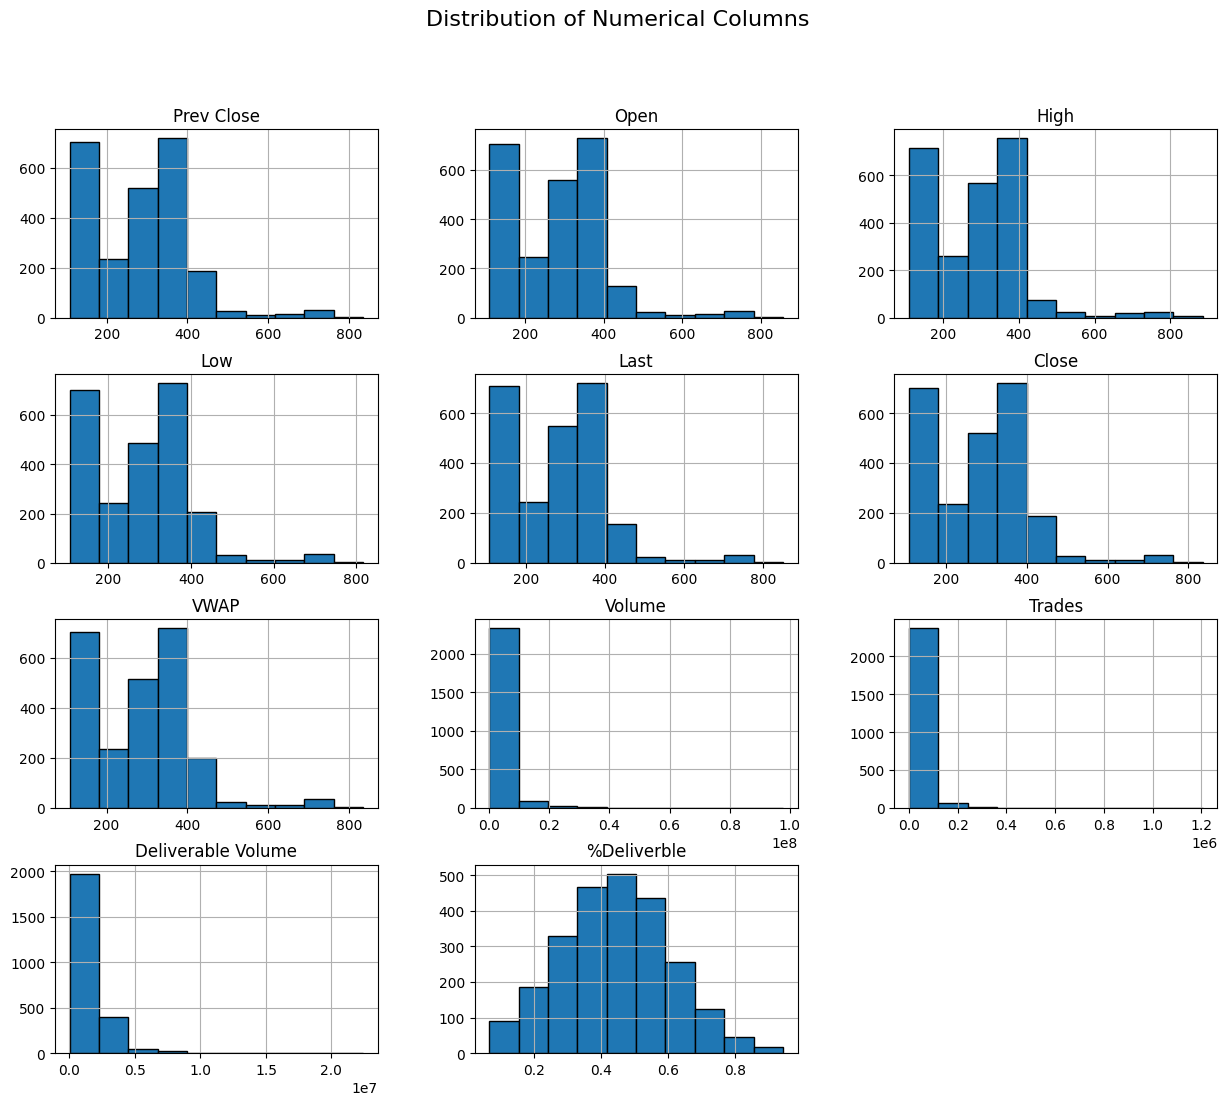

In [9]:
num_cols=df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df[num_cols].hist(bins=10, figsize=(15, 12), edgecolor='black')
plt.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.show()

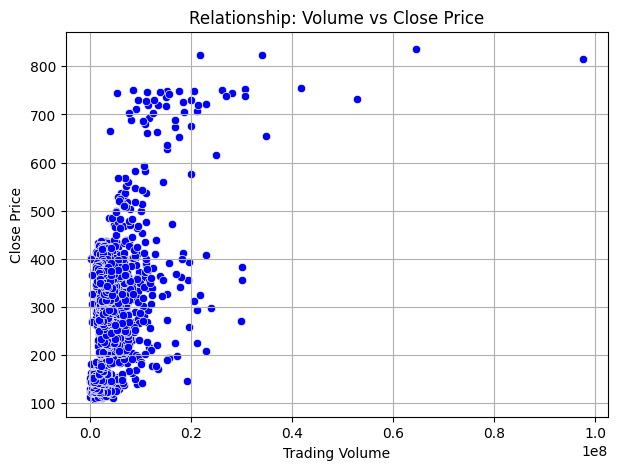

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Volume', y='Close', data=df, color='blue')
plt.title("Relationship: Volume vs Close Price")
plt.xlabel("Trading Volume")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

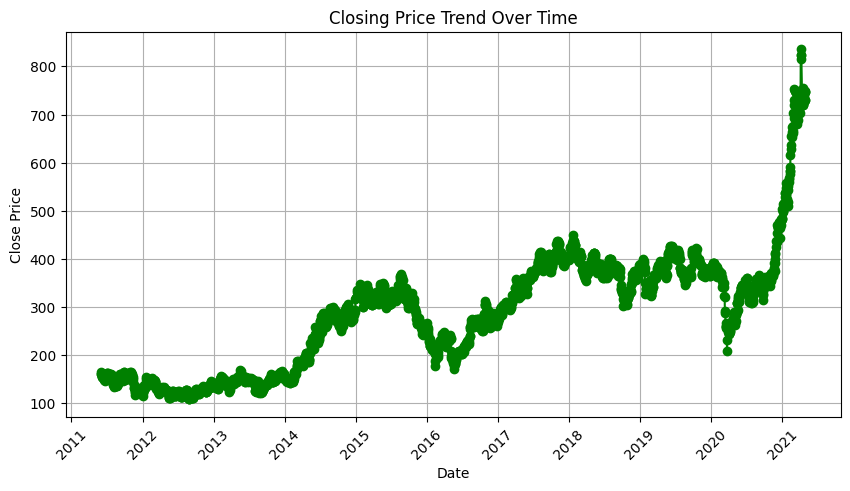

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], marker='o', color='green')
plt.title("Closing Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

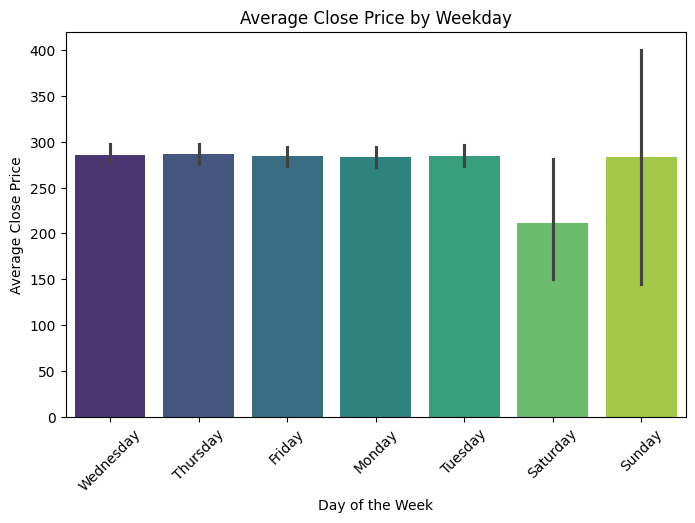

In [12]:
df['Weekday'] = df['Date'].dt.day_name()

plt.figure(figsize=(8,5))
sns.barplot(x='Weekday', y='Close', data=df, palette='viridis')
plt.title("Average Close Price by Weekday")
plt.ylabel("Average Close Price")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Moving Averages')

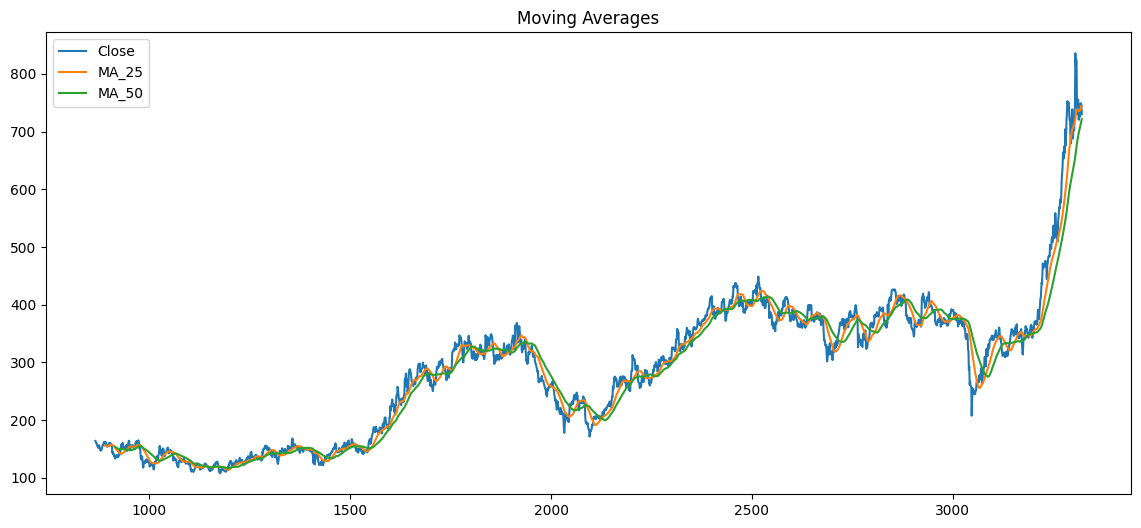

In [13]:
df['MA_25'] = df['Close'].rolling(window=25).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()

df[['Close','MA_25','MA_50']].plot(figsize=(14,6))
plt.title("Moving Averages")

Text(0.5, 1.0, 'Rolling Volatility (Over 20-day window)')

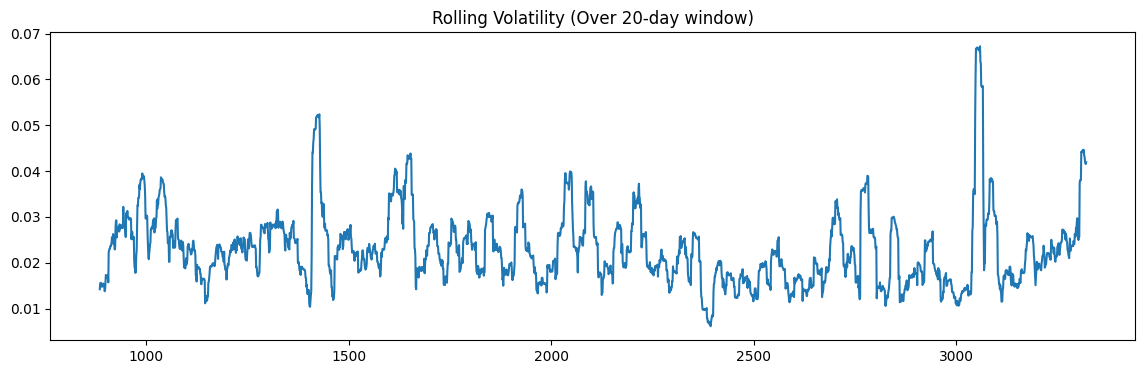

In [14]:
df['Volatility'].plot(figsize=(14,4))
plt.title("Rolling Volatility (Over 20-day window)")

In [15]:
corr=df['Close'].corr(df['Volume'])
print("Correlation between Close and Volume:", corr)

Correlation between Close and Volume: 0.481237671188491


In [16]:
df.dropna(inplace=True)
features = ['Close','Volume','MA_25','MA_50','Volatility']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features])

# Sliding window sequence function
def create_sequences(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i, 0]) 
    return np.array(X), np.array(y)

window = 15
X, y = create_sequences(scaled,window)

# Check for NaN values in the NumPy array X
nan_count_X = np.isnan(X).sum()
print(f"Number of NaN values in X: {nan_count_X}")

# Check for NaN values in the NumPy array y
nan_count_y = np.isnan(y).sum()
print(f"Number of NaN values in y: {nan_count_y}")

# Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


Number of NaN values in X: 0
Number of NaN values in y: 0


In [17]:
model = Sequential([
    Conv1D(110, 3, activation='relu', padding='same', input_shape=(window, len(features))),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(110, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(110, 3, activation='relu', padding='same'),
    BatchNormalization(),

    Conv1D(110, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    Flatten(),
    Dense(110, activation='relu'),
    Dropout(0.4),
    Dense(110, activation='relu'),
    Dropout(0.4),

    Dense(1)
])
optimizer = AdamW(learning_rate=5e-5, weight_decay=0.01)


model.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=['mae', 'mse']
)
model.summary()

# Set up early stopping and learning rate tuning
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stop, reduce_lr]
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 15, 110)             │           1,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 110)             │             440 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 7, 110)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 7, 110)              │          36,410 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 110)              │             440 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 3, 110)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 110)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 3, 110)              │          36,410 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 110)              │             440 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 3, 110)              │          36,410 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3, 110)              │             440 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 110)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 110)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1, 64)               │          44,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 110)                 │           7,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 110)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 110)                 │          12,210 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 210,045 (820.49 KB)

 Trainable params: 209,165 (817.05 KB)

 Non-trainable params: 880 (3.44 KB)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 35s 204ms/step - loss: 0.0513 - mae: 0.1845 - mse: 0.0513 - val_loss: 0.1141 - val_mae: 0.3360 - val_mse: 0.1141 - learning_rate: 5.0000e-05
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0404 - mae: 0.1591 - mse: 0.0404 - val_loss: 0.1052 - val_mae: 0.3224 - val_mse: 0.1052 - learning_rate: 5.0000e-05
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0297 - mae: 0.1344 - mse: 0.0297 - val_loss: 0.0957 - val_mae: 0.3075 - val_mse: 0.0957 - learning_rate: 5.0000e-05
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0193 - mae: 0.1077 - mse: 0.0193 - val_loss: 0.0859 - val_mae: 0.2910 - val_mse: 0.0859 - learning_rate: 5.0000e-05
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0108 - mae: 0.0787 - mse: 0.0108 - val_loss: 0.0772 - val_mae: 0.2757 - val_mse: 0.0772 - learning_rate: 5.0000e-05
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0084 - mae: 0.0689 - mse: 0.0084 - val_loss: 0

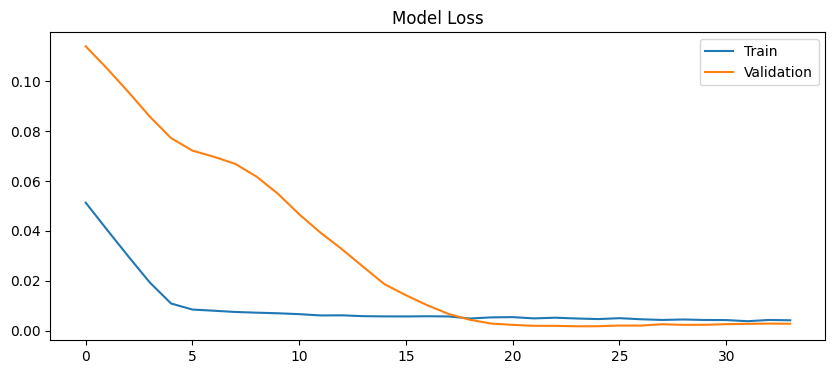

In [18]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss'); plt.legend();

In [19]:
y_pred = model.predict(X_test)

def inverse_scale(scaled_vals):
    dummy = np.zeros((len(scaled_vals), len(features)))
    dummy[:,0] = scaled_vals
    return scaler.inverse_transform(dummy)[:,0]

y_test_actual = inverse_scale(y_test)
y_pred_actual = inverse_scale(y_pred.squeeze())

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step


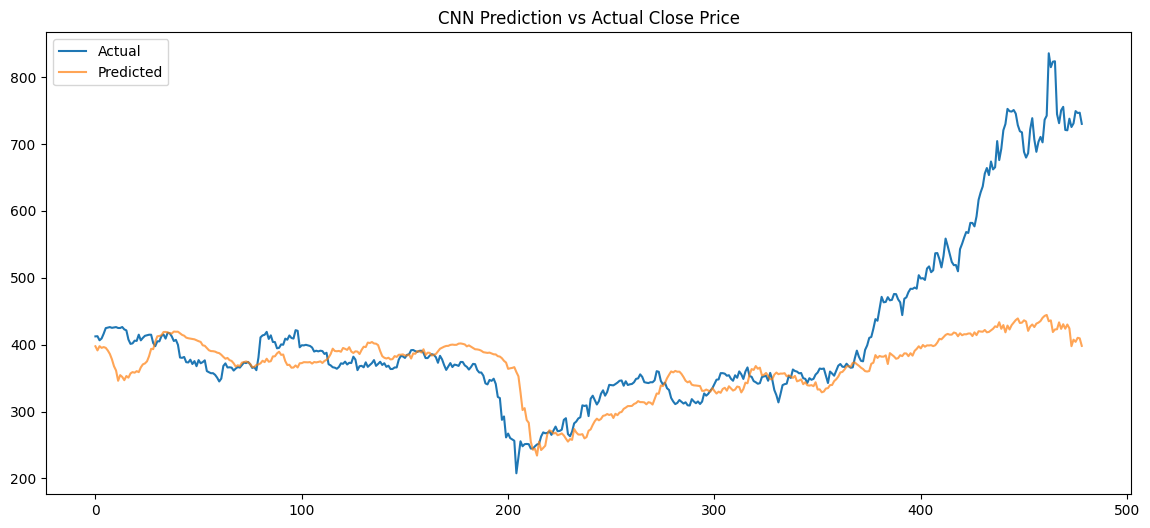

In [20]:
plt.figure(figsize=(14,6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred_actual, label='Predicted', alpha=0.7)
plt.title("CNN Prediction vs Actual Close Price")
plt.legend()

Text(0.5, 1.0, 'Prediction Error Distribution')

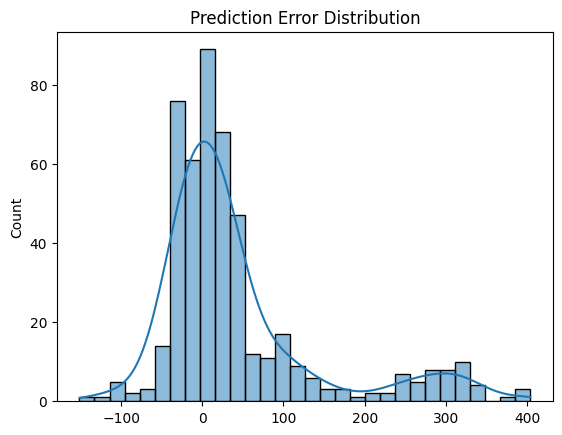

In [21]:
errors = y_test_actual - y_pred_actual
sns.histplot(errors, bins=30, kde=True)
plt.title("Prediction Error Distribution")

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_predictions(y_true, y_pred, prices_true, prices_pred):
    """
    Comprehensive evaluation combining regression and financial metrics.
    
    Parameters:
    - y_true: True scaled target values
    - y_pred: Predicted scaled target values
    - prices_true: Original true prices (unscaled)
    - prices_pred: Original predicted prices (unscaled)
    
    Returns:
    Dictionary of evaluation metrics.
    """
    
    # Regression metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Financial metrics based on returns
    actual_returns = np.diff(prices_true) / prices_true[:-1]
    predicted_returns = np.diff(prices_pred) / prices_true[:-1]
    
    # Directional accuracy: percent of times the predicted +ve / -ve return matches actual
    directional_accuracy = np.mean((actual_returns > 0) == (predicted_returns > 0))
    
    # Information Coefficient: correlation between actual and predicted returns
    ic = np.corrcoef(actual_returns, predicted_returns)[0, 1]
    
    # Sharpe ratio (annualized assuming daily returns)
    sharpe_ratio = (np.mean(predicted_returns) / np.std(predicted_returns) * np.sqrt(252)
                    if np.std(predicted_returns) > 0 else 0)
    
    return {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'Directional Accuracy': directional_accuracy,
        'Information Coefficient': ic,
        'Sharpe Ratio': sharpe_ratio
    }


In [23]:
metrics = evaluate_predictions(y_test, y_pred.squeeze(), y_test_actual, y_pred_actual)

print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Evaluation Metrics:
MSE: 0.0219
MAE: 0.0862
RMSE: 0.1479
R2: 0.2372
Directional Accuracy: 0.5126
Information Coefficient: -0.0225
Sharpe Ratio: -0.3177
